# Buildables Task 9


02 Sep 2025

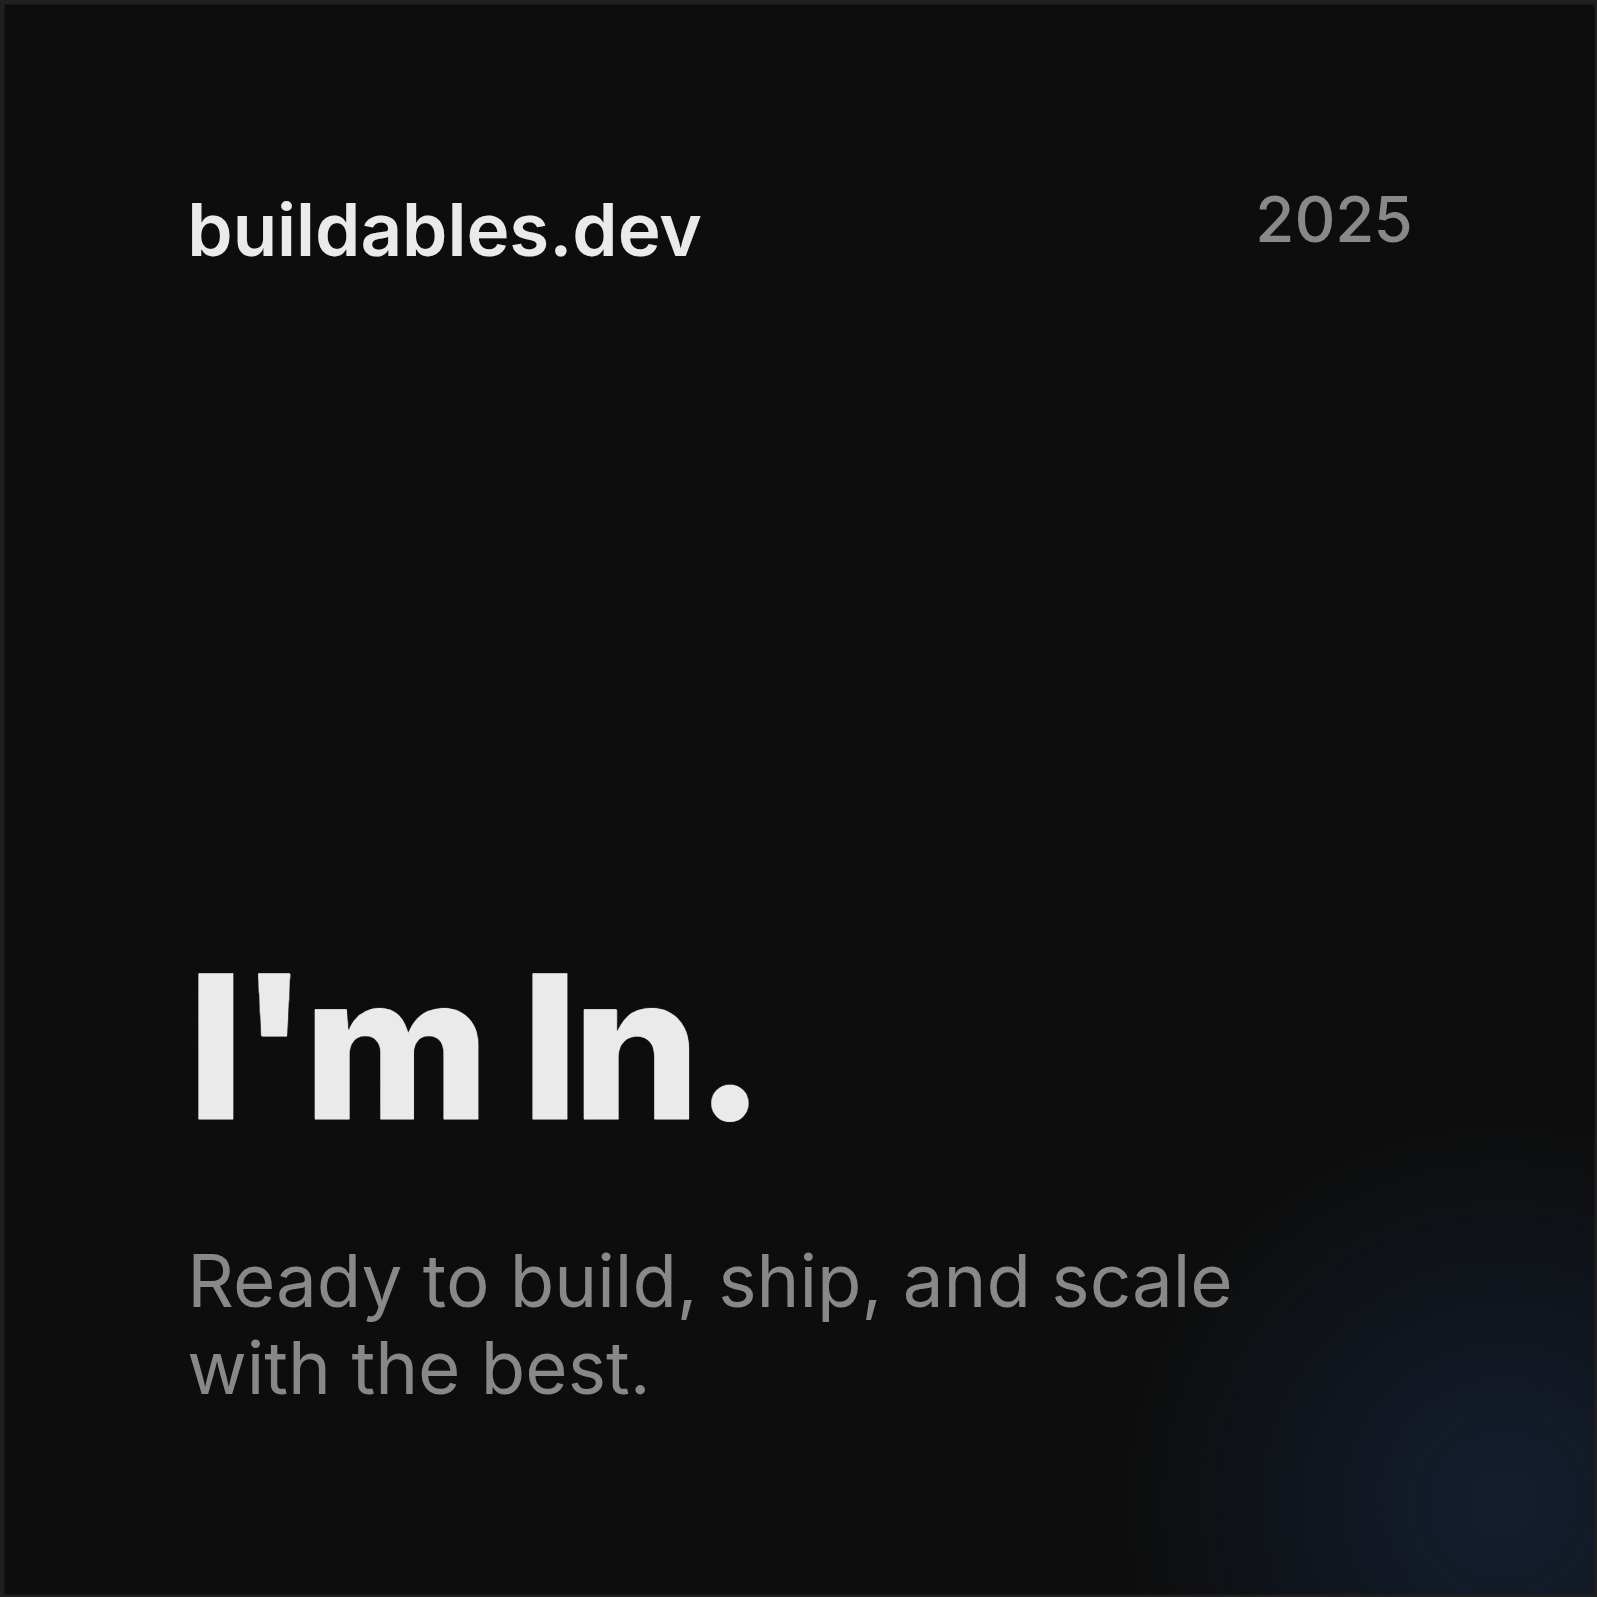

In [133]:
from IPython.display import Image,Markdown, display #importing the cover image
image_path = r"C:\Users\Saliu\OneDrive\Desktop\Buildables\ignore\buildables-imin.png"
# Display the image
Image(filename=image_path)

## 1. Introduction  

This notebook represent the ningth task of the buildables fellowship which focuses on real-world data processing and feature engineering. Each task uses a well-known dataset and tackles common challenges in preparing data for ml models.





### 2.0 Data Preprocessign and Feature Engineering 

This week task focues on real-word data preprocessing and feature engineering. Each task uses a well- known dataset and tackles common challenges in preparing dta for ml models

### 2.1 Handling Missing Data - Titanic Dataset

Identifying and handling missing data on the titanic dataset

- loading the dataset

In [134]:
import pandas as pd
#loading the dataset
df_1= pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\Daily_Task\tianic_train.csv')
df_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- checking for missing data

In [135]:
#handling missing data
df_1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The age and cabin column have various degree of missing values

- handling the missing data

In [136]:
#imputing the age and cabin column with the most frequent age
df_1['Age']= df_1['Age'].fillna(df_1['Age'].mode()[0])
df_1['Cabin']= df_1['Cabin'].fillna(df_1['Cabin'].mode()[0])
df_1['Embarked']= df_1['Embarked'].fillna(df_1['Embarked'].mode()[0])

In [137]:
#preview of the data after handling missing data
df_1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#

No more missing data

### 2.2 Encoding Categorical Variables – Car Evaluation Dataset
Encoding categorical variables

- loading the dataset

In [138]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder


# Fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# Features and target
X = car_evaluation.data.features
y = car_evaluation.data.targets

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)

df.head()



,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


The table shows the raw dataset before encoding

- One Hot Encoding

In [139]:
# ONe hot Encoding 
df_onehot = pd.get_dummies(df,dtype=int, drop_first=True)

print("\nOne-Hot Encoded DataFrame:")
df_onehot.head()



One-Hot Encoded DataFrame:


,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class_good,class_unacc,class_vgood
0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0


- Label encoding

In [140]:
# ----- Categorical Encoding -----
le = LabelEncoder()
df_encoded = df.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

print("\nLabel Encoded DataFrame:")
df_encoded.head()


Label Encoded DataFrame:


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Label encoding assigns integers to categories, making it simple but potentially misleading for nominal data, while one-hot encoding represents categories as independent binary columns (0/1), avoiding false order assumptions and better suited for categorical features.

### 2.3 Feature Scaling – Wine Quality Dataset

Applying normalization and standardization techniques with a focus on the distribution of the colunms after the normalization


In [141]:
# Fetch dataset
wine_quality = fetch_ucirepo(id=186)

# Features and target
X = wine_quality.data.features
y = wine_quality.data.targets
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [142]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Example: fit and transform your data
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]], shape=(6497, 11))

Normalizing the data brings it to the same scale which helps the model avoid bias towards features with higher scales like alchol and fixed_acidity

### 2.4 Handling Outliers – Boston Housing Dataset
Detecting and treating outliers in the boston housing dataset


- loading the data

In [143]:
df_housing= pd.read_csv(r"C:\Users\Saliu\OneDrive\Desktop\Buildables\boston_train.csv")
df_housing.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


- Using the IQR range to remove outliers in the crim column

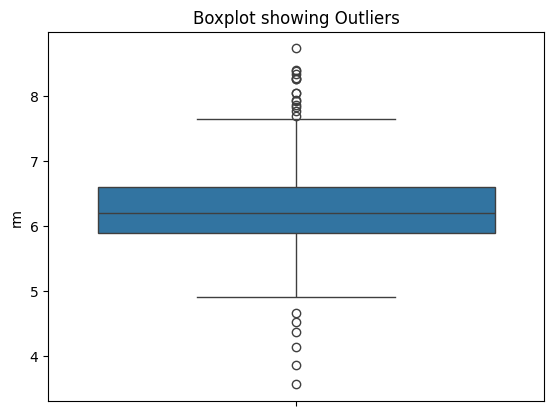

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# plotting a boxplot to visualize the outliers
sns.boxplot(df_housing.rm)
plt.title('Boxplot showing Outliers')
plt.show()

The figure displays a boxplot showing the distribution of the data indicating the presece of outliers on the upper bounds

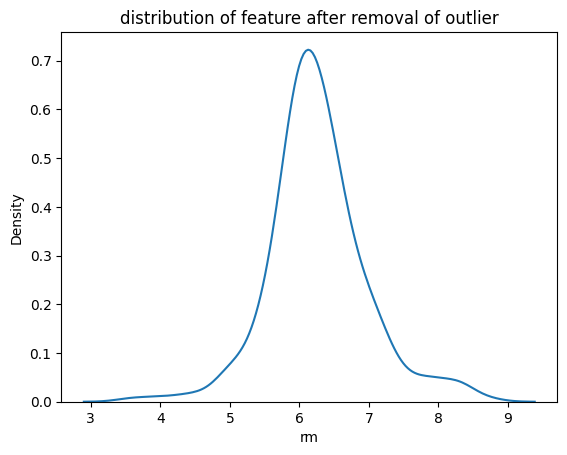

In [145]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_housing['rm'].quantile(0.25)
Q3 = df_housing['rm'].quantile(0.75)

# Calculating the IQR
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
df_housing_cleaned = df_housing[(df_housing['rm'] > lower_bound) | (df_housing['rm'] < upper_bound)]

# Display the outlier
sns.kdeplot(df_housing_cleaned.rm)
plt.title('distribution of feature after removal of outlier')
plt.show()

### 2.5 Advanced Data Imputation – Retail Sales Dataset
Handle missing values using advanced techniques Techniques: KNN imputation, MICE.

- loading the data

In [146]:
df_data = pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\synthetic_coffee_health_10000.csv')
# Select only numeric columns
numeric_cols = df_data.select_dtypes(include=['number']).columns
df_numeric = df_data[numeric_cols]
df_numeric.head(10)

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
0,1,40,3.5,328.1,7.5,24.9,78,14.5,0,0
1,2,33,1.0,94.1,6.2,20.0,67,11.0,0,0
2,3,42,5.3,503.7,5.9,22.7,59,11.2,0,0
3,4,53,2.6,249.2,7.3,24.7,71,6.6,0,0
4,5,32,3.1,298.0,5.3,24.1,76,8.5,0,1
5,6,32,3.4,326.4,6.4,27.0,82,8.8,0,0
6,7,53,2.7,252.1,7.8,24.3,58,1.0,1,0
7,8,44,4.5,423.5,5.5,15.8,62,0.7,1,1
8,9,29,1.7,162.0,7.1,21.7,60,2.2,1,1
9,10,41,4.0,383.2,6.4,30.4,69,11.9,0,0


- Handling missing data with KNN

In [147]:

from sklearn.impute import KNNImputer

# Select only numeric columns
numeric_cols = df_data.select_dtypes(include=['number']).columns
df_numeric = df_data[numeric_cols]

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)
df_knn_numeric = pd.DataFrame(knn_imputer.fit_transform(df_numeric), columns=numeric_cols)
print("\nAfter KNN Imputation:\n")

df_knn_numeric





After KNN Imputation:



,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
0,1.0,40.0,3.5,328.1,7.5,24.9,78.0,14.5,0.0,0.0
1,2.0,33.0,1.0,94.1,6.2,20.0,67.0,11.0,0.0,0.0
2,3.0,42.0,5.3,503.7,5.9,22.7,59.0,11.2,0.0,0.0
3,4.0,53.0,2.6,249.2,7.3,24.7,71.0,6.6,0.0,0.0
4,5.0,32.0,3.1,298.0,5.3,24.1,76.0,8.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,9996.0,50.0,2.1,199.8,6.0,30.5,50.0,10.1,0.0,1.0
9996,9997.0,18.0,3.4,319.2,5.8,19.1,71.0,11.6,0.0,0.0
9997,9998.0,26.0,1.6,153.4,7.1,25.1,66.0,13.7,1.0,1.0
9998,9999.0,40.0,3.4,327.1,7.0,19.3,80.0,0.1,0.0,0.0


### 2.6 Feature Engineering – Heart Disease Dataset
Creating new derived features.

- loading the dataset

In [148]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


- feature engineering

In [149]:

bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

X['age_group'] = pd.cut(X['age'], bins=bins, labels=labels)
#looking at the engineered column
X[['age','age_group']]

,age,age_group
0,63,60-69
1,67,60-69
2,67,60-69
3,37,30-39
4,41,40-49
...,...,...
298,45,40-49
299,68,60-69
300,57,50-59
301,57,50-59


### 2.7 Variable Transformation – Bike Sharing Dataset
Transform skewed variables.
Techniques: Log, square root, Box-Cox transformations.

- loading the dataset

In [150]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features

X

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


- Displaying the skewed feature

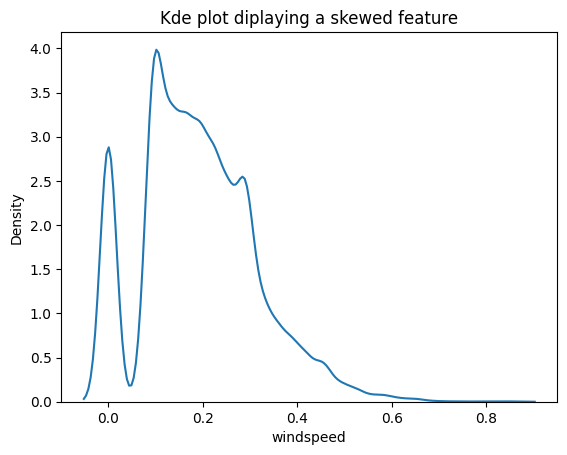

In [151]:
sns.kdeplot(X.windspeed)
plt.title('Kde plot diplaying a skewed feature')
plt.show()


Image shwowing a right skewed feature

- Using log transformation

In [152]:
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

X['windspeed_log']= np.log(X['windspeed'])

- displaying the transformed feature

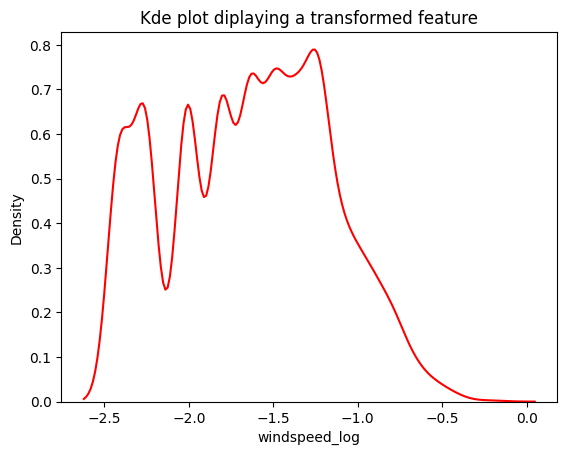

In [153]:
sns.kdeplot(X.windspeed_log, color= 'red')
plt.title('Kde plot diplaying a transformed feature')
plt.show()

Image showing the transformed feature

### 2.8 Feature Selection – Diabetes Dataset
Selecting  important features using Correlation analysis, mutual information, recursive feature elimination (RFE).

- loading the data

In [154]:
df_diabetes= pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\diabetes.csv')
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Feature selection

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Load data
df_diabetes = pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\diabetes.csv')

# Separate features and target
X = df_diabetes.drop("Outcome", axis=1)   # Features
y = df_diabetes["Outcome"]                # target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model (Logistic Regression)
model = LogisticRegression(max_iter=1000, solver="liblinear")

# Perform RFE (select top 5 features for example)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X_train, y_train)

# Print results
print("Selected Features:", X.columns[fit.support_].tolist())
print("Feature Ranking:", fit.ranking_)



Selected Features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Feature Ranking: [1 1 2 3 4 1 1 1]


### 2.9 Handling Imbalanced Data – Credit Card Fraud Detection
Managing class imbalance Techniques: SMOTE, ADASYN, undersampling.

- loading the data

In [156]:
df_card= pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\creditcard.csv')
df_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Handling data imbalance

In [157]:
df_card['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The 1 class is severly undersampled which would affect the accuracy of our model, we would oversample the minority class for balance

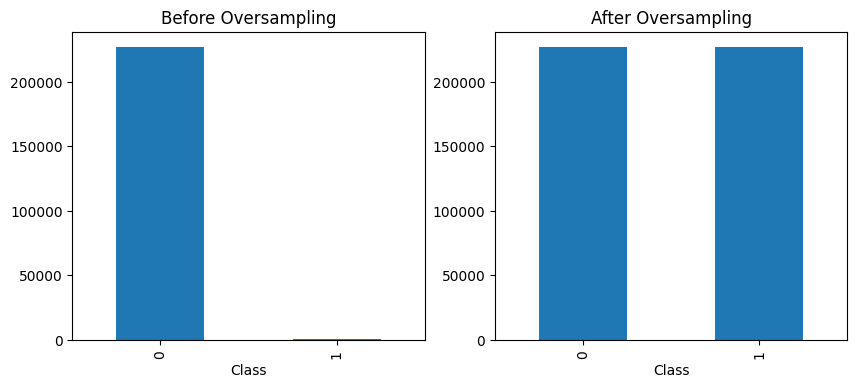

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Features and target
X = df_card.drop("Class", axis=1)
y = df_card["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# --- Plot class distribution before & after ---
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

y_train.value_counts().plot(kind="bar", ax=ax[0], title="Before Oversampling")
y_resampled.value_counts().plot(kind="bar", ax=ax[1], title="After Oversampling")

plt.show()



SMOTE was used to balance the dataset

### 3.0 Combining Multiple Datasets – MovieLens Dataset
Merging and preprocessing multiple related datasets.

- loading and merging the dataset

In [159]:
df_links = pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\links.csv')
df_movies = pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\movies.csv')
df_ratings = pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\ratings.csv')
df_tags = pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\tags.csv')
display(df_links.head())
display(df_movies.head())
display(df_ratings.head())
display(df_tags.head())

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [160]:
from functools import reduce

dataframes = [df_links, df_movies, df_ratings, df_tags]
df_merged = reduce(lambda left, right: pd.merge(left, right, on="movieId", how="inner"), dataframes)
df_merged.head()

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825


### 3.1 Dimensionality Reduction – MNIST Dataset
- Reducing feature space while keeping variance using  PCA, t-SNE (basic).

Loading MNIST dataset...
Explained variance ratio (50 components): 0.55
Running t-SNE (this may take some time)...


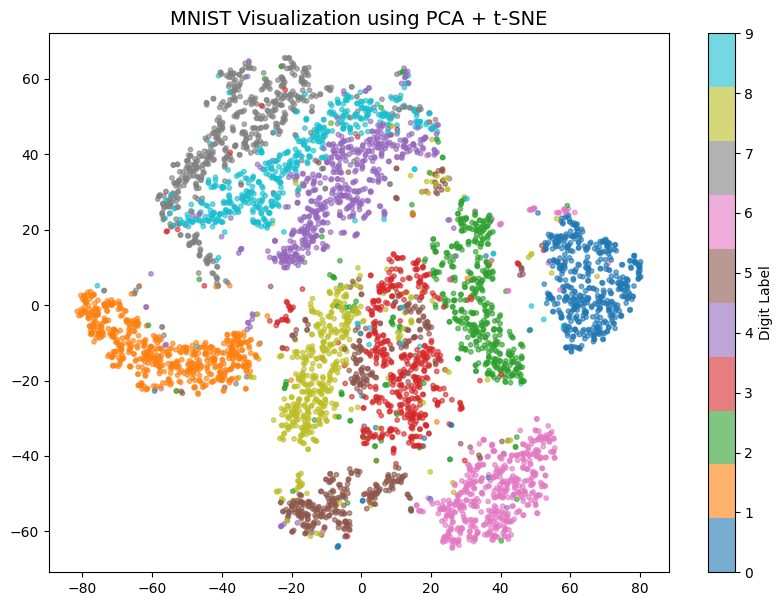

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load MNIST dataset
# -------------------------------
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Scale data (important for PCA & t-SNE)
X_scaled = StandardScaler().fit_transform(X)

# -------------------------------
# PCA - Dimensionality Reduction
# -------------------------------
pca = PCA(n_components=50)  # reduce to 50 dimensions while retaining variance
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio (50 components): {np.sum(pca.explained_variance_ratio_):.2f}")

# -------------------------------
# t-SNE - Visualization in 2D
# -------------------------------
print("Running t-SNE (this may take some time)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_pca[:5000]) 

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y[:5000], cmap="tab10", alpha=0.6, s=10)
plt.colorbar(scatter, label="Digit Label")
plt.title("MNIST Visualization using PCA + t-SNE", fontsize=14)
plt.show()


### 3.2 Text Preprocessing – IMDB Movie Reviews Dataset
- Clean and preprocess text for ML models.
- Steps: Lowercasing, stopword removal, stemming/lemmatization, tokenization.
- Dataset: IMDB Reviews

- loading the dataset

In [163]:
df_reviews= pd.read_csv(r'C:\Users\Saliu\OneDrive\Desktop\Buildables\IMDB Dataset.csv')
df_reviews.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [167]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources (run once)

nltk.download("punkt")
nltk.download("punkt_tab")  # <-- new requirement
nltk.download("stopwords")
nltk.download("wordnet")


# Preprocessing function
# -------------------------------
def preprocess_text(text, use_stemming=False):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove special characters, digits, punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenization
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Stemming or Lemmatization
    if use_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    else:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# -------------------------------
# Apply preprocessing
# -------------------------------
df_reviews['clean_review'] = df_reviews['review'].apply(lambda x: preprocess_text(x, use_stemming=False))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saliu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Saliu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saliu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saliu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [168]:
#previewing the processed reviews
# Show sample
df_reviews[['review', 'clean_review']].head()


,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


### 3.3 Time-Series Preprocessing – Air Quality Dataset
- Handle missing timestamps, resampling, and smoothing.

- loading the dataset

In [170]:
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 

X


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


Handling missing timestamps, resampling and smoothing

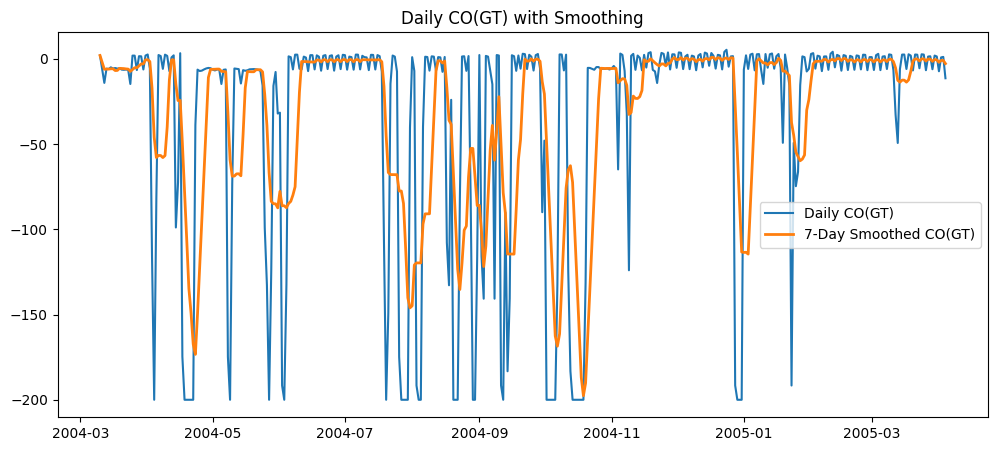

In [173]:
# Combine Date + Time
X['Datetime'] = pd.to_datetime(
    X['Date'] + ' ' + X['Time'], 
    format='%m/%d/%Y %H:%M:%S',   # <-- US-style month/day
    errors='coerce'               # turn bad rows into NaT instead of crashing
)

# Set Datetime as index
X.set_index('Datetime', inplace=True)

# Drop original Date and Time columns
X.drop(columns=['Date', 'Time'], inplace=True)

# -------------------------------
# Handle missing timestamps
# -------------------------------
# Reindex to ensure continuous hourly frequency
X = X.asfreq('H')

# -------------------------------
# Handle missing values (example: forward fill)
# -------------------------------
X = X.fillna(method='ffill')

# -------------------------------
# Resampling
# -------------------------------
# Daily average of pollutants
df_daily = X.resample('D').mean()

# -------------------------------
# Smoothing
# -------------------------------
# 7-day rolling mean (for daily data)
df_daily_smooth = df_daily.rolling(window=7, min_periods=1).mean()

# Example visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_daily['CO(GT)'], label="Daily CO(GT)")
plt.plot(df_daily_smooth['CO(GT)'], label="7-Day Smoothed CO(GT)", linewidth=2)
plt.legend()
plt.title("Daily CO(GT) with Smoothing")
plt.show()


## 4. Conlusion

This task explored in-depth concepts in data preprocessing and feature engineering